# Analiza podstrani(subredditov) r/news in r/worldnews spletne strani Reddit

Reddit je ameriška zabavna, družbena in novičarska spletna stran.
Na Reddit uporabniki objavljajo razne povezave (večinoma na druge spletne strani), ki jih lahko drugi uporabniki ocenijo pozitivno (upvote) ali negativno (downvote) in komentirajo. Razdeljena je na več podstrani-subredditov.

Podstrani r/news in r/worldnews sta privzeti. Objave privzetih strani se pokažejo neregistriranim in novim uporabnikom na naslovnici(front page), ker se večina uporabnikov od podstrani ne odjavi, le prijavi, imajo tako privzete strani avtomatsko največ uporabnikov.

Primerjala sem novice dveh takih večjih podstrani r/news-novice in r/worldnews-svetovne novice. Podstrani so razdeljene na več delov, analizirala sem top-najboljše in contraversial-kontraverzno.

## Hipoteze
    - 1. r/news bo imel več ameriških virov novic kot r/worldnews.
    - 2. Viri r/worldnews bodo kvalitetnejše od virov r/news. (The Guardian > FoxNews ) 
    - 3. Novice iz predela kontraverzno bodo iz tabloidov, rumenega tiska ali z zavajujočo vsebino*.
## Zanimivosti
    - Kateri viri so najbolje ocenjeni v posamezni kategoriji?
    - Kratek pregled 5 najbolje ocenjenih novic vsake kategorije
    - Kateri vir je najbolje ocenjen v r/news in r/worldnews skupaj
    - Kateri viri najbolj odstopajo (so izrazito bolje ocenjeni v posamezni kategoriji)
    - Primerjava povprečnih ocen in komentarjev najpogostejših virov, ki se pojavljajo v kategorijah kontraverzno in najboljse
    
\* Kontraverzne/manj kvalitetnejše vire sem določila s pomočjo lastnih izkušenj prebiranja novic in s pomočjo opisov škandalov na Wikipediji (<https://en.wikipedia.org/wiki/Main_Page>).

In [74]:
import pandas as pd
%matplotlib inline
pd.set_option('max_colwidth',400)

In [75]:
news_con=pd.read_csv('news_con.csv')
news_top=pd.read_csv('news_top.csv')
wnews_con=pd.read_csv('wnews_con.csv')
wnews_top=pd.read_csv('wnews_top.csv')

In [76]:
news_con_viri=news_con.groupby(['Vir'],as_index=False)
news_top_viri=news_top.groupby(['Vir'],as_index=False)
wnews_con_viri=wnews_con.groupby(['Vir'],as_index=False)
wnews_top_viri=wnews_top.groupby(['Vir'],as_index=False)

### Hipoteza 1: r/news bo imel več ameriških virov novic kot r/worldnews
Že v samem opisu podstrani r/worldnews je zapisano, da stran dovoljuje povezave na vse novice, razen notranjih zadev in politike ZDA. Tako še s preštetjem pojavitve virov potrdimo, da hipoteza drži.

Združila sem skupaj število novic posameznega vira r/news in r/worldnews. Tako sem dobila vpogled v seznam najpogostejših virov na posamezni strani.

In [77]:
viri_news=pd.concat([news_con,news_top]).groupby(by='Vir',as_index=False).count()
viri_wnews=pd.concat([wnews_con,wnews_top]).groupby(by='Vir',as_index=False).count()

In [5]:
pogosti_news=viri_news[['Vir','Naslov']].sort_values(by='Naslov',ascending=False).head(n=10).set_index(['Vir'])
pogosti_news

,Naslov
Vir,
washingtonpost.com,58
theguardian.com,48
foxnews.com,25
nytimes.com,23
news.yahoo.com,22
nbcnews.com,21
abcnews.go.com,19
cnn.com,19
independent.co.uk,19


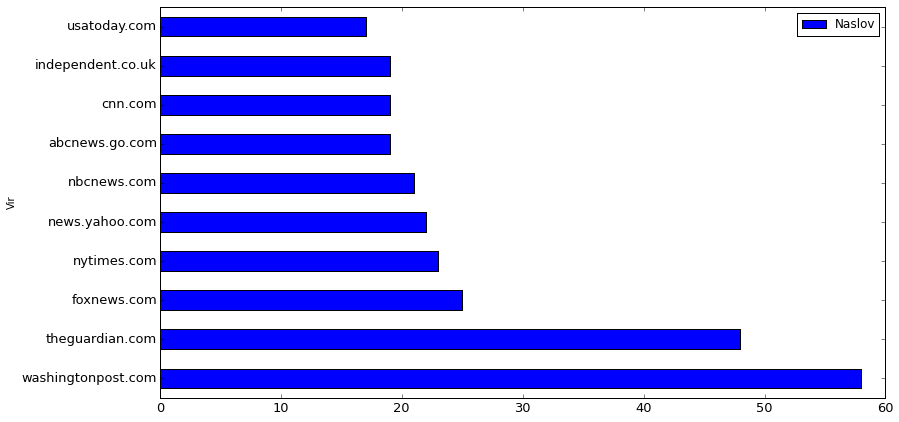

In [36]:
pogosti_news.plot(kind='barh',figsize =(13,7),fontsize=13)

In [16]:
pogosti_wnews=viri_wnews[['Vir','Naslov']].sort_values(by='Naslov',ascending=False).head(n=10).set_index(['Vir'])
pogosti_wnews

,Naslov
Vir,
theguardian.com,64
rt.com,54
bbc.co.uk,36
dailymail.co.uk,31
independent.co.uk,30
bbc.com,29
nytimes.com,24
reuters.com,21
self.worldnews,16


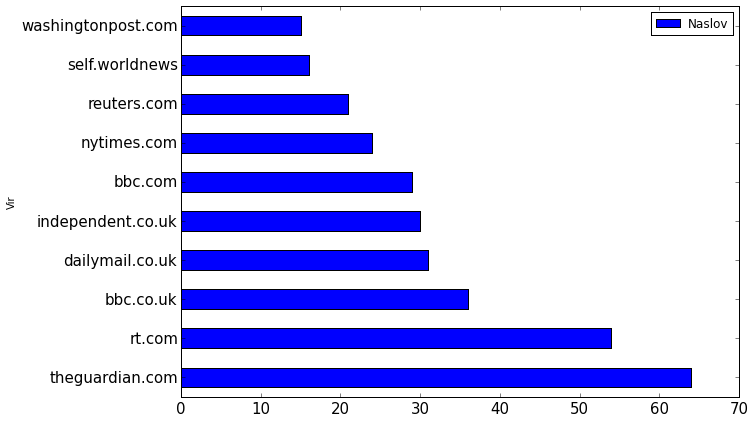

In [37]:
pogosti_wnews.plot(kind='barh',figsize =(10,7),fontsize=15)

Komentar: 
(Analiziram samo 10 najpogostejših virov)
V razdelku r/news se pojavi samo 2 neameriška vira (theguardian.com in independent.co.uk).
V razdelku r/worldnews sta tudi samo 2 ameriška vira(nytimes.com, washingtonpost.com) uvrstila med 10 najpogostejših.

Predvidevem lahko, da so bralci in naročniki r/news večinoma prebivalci ZDA, ki jih seveda zanimajo novice povezane z ZDA, bralci r/worldnews pa so ostali obiskovalci Reddita.

Moja hipoteza je potrjena. V r/news je 8 ameriških virov, v r/wnews pa le 2.

###  Hipoteza 2:Viri r/worldnews bodo kvalitetnejše od virov r/news.


S pomočjo prejšnih tabel ugotovimo, da se med najpogostejšimi viri r/news izstopa samo foxnews.com, za katerega bi lahko trdili, da ne poroča najbolj objektivneje.

Med najpogostejšimi viri r/worldnews zasledimo 2, ki bi ju lahko uvrstili med pristranski in rumeni tisk. To sta na drugem mestu po pogostosti ruska spletna stran rt.com in britanski tabloid dailymail.co.uk.

Moja hipoteza ne drži. Viri r/worldnews in r/news so si enakovredni.

### Hipoteza 3 : Novice iz predela kontraverzno bodo iz tabloidov, rumenega tiska ali z zavajujočo vsebino.
Sedaj združim vire novic kontraverzno in najboljše.

In [139]:
novice_kontraverzno=pd.concat([wnews_con,news_con])
novice_najboljse=pd.concat([wnews_top,news_top])
novice_kontraverzno_viri=pd.concat([wnews_con,news_con]).groupby(by='Vir',as_index=False).count()
novice_najboljse_viri=pd.concat([wnews_top,news_top]).groupby(by='Vir',as_index=False).count()
novice_kontraverzno['povprecje']=(novice_kontraverzno.Komentarji+novice_kontraverzno.Score)/2
novice_najboljse['povprecje']=(novice_najboljse.Komentarji+novice_najboljse.Score)/2

In [140]:
naj10_con=novice_kontraverzno_viri[['Vir','Naslov']].sort_values(by='Naslov',ascending=False).head(n=10)
naj10_con

,Vir,Naslov
396,rt.com,50
95,dailymail.co.uk,34
440,theguardian.com,28
168,foxnews.com,22
508,washingtonpost.com,21
43,bbc.co.uk,20
328,news.yahoo.com,18
345,nytimes.com,17
215,independent.co.uk,16
469,timesofisrael.com,15


In [141]:
naj10_top=novice_najboljse_viri[['Vir','Naslov']].sort_values(by='Naslov',ascending=False).head(n=10)
naj10_top

,Vir,Naslov
366,theguardian.com,84
415,washingtonpost.com,52
28,bbc.com,33
173,independent.co.uk,33
284,nytimes.com,30
309,reuters.com,27
27,bbc.co.uk,26
254,nbcnews.com,19
268,news.yahoo.com,18
31,bigstory.ap.org,17


Na vrhu kontraverzno opazimo medij ruske vladne propagande. rt.com (Russia Today) slovi 
kot pristranska (seveda, v korist rusom) in zavajajoča novinarska hiša, znana po širjenju napačnih informacij.
V spodnji tabeli je zapisanih 5 najbolje ocenjenih novic rt.com. Opazimo, da so novice nenaklonjene ZDA (85, 123,433) (ZDA ne marajo Snowdena...) in seveda vzmirjajočo novico za uporabnike spleta (235).

In [142]:
novice_kontraverzno[novice_kontraverzno['Vir'] =='rt.com'].sort_values('povprecje', ascending=False).head()

,Naslov,Score,Komentarji,Vir,povprecje
85,The US has been voted as the most significant threat to world peace in a survey across 68 different countries,2233,5979,rt.com,4106.0
235,UK: Man jailed for 33 months for pirating ‘Fast &amp; Furious’,2396,3245,rt.com,2820.5
433,"Snowden nominated for Nobel Peace Prize by Swedish professor. ""[H]eroic effort at great personal cost.”",2169,687,rt.com,1428.0
16,Obama considers ending NSA surveillance programs.,1252,1060,rt.com,1156.0
123,"New video: Edward Snowden receives award from NSA, CIA, FBI and DOJ officials, breaks silence on NSA programs for the first time in Russia. Reveals new details on how mass surveillance makes us less - not more - safe.",1593,575,rt.com,1084.0


Na drugo mesto po pogostosti virov kontraverznih novic je britanski rumeni tračarski časopis dailymail.co.uk.
Znani konservativni tabloid je znan po nenatančnem, pristranskem in senzacionalnem poročanju. Večkrat se zatekajo k razdvajanju javnosti in napihovanju težav. To potrdi tudi seznam 4 najbolje ocenjenih novic. (Ena je bila na strani objavljena dvakrat). 
Novice so povezane s spolnim nasiljem(61), nasiljem (192,307) in krščanstvom(178). 

In [143]:
novice_kontraverzno[novice_kontraverzno['Vir'] =='dailymail.co.uk'].sort_values('Score', ascending=False).head()

,Naslov,Score,Komentarji,Vir,povprecje
192,Mobs of 'hundreds' of masked men rampage through Stockholm central station beating up refugee children,3339,6268,dailymail.co.uk,4803.5
61,Roman Catholic church's paedophile investigator jailed for possessing thousnds of child porn images,772,784,dailymail.co.uk,778.0
307,'Someone's coming to get me': Terrified phone-hacking whistleblower feared for his life before he was found dead.\r\n,359,149,dailymail.co.uk,254.0
184,'Someone's coming to get me': Terrified phone-hacking whistleblower feared for his life before he was found dead.\r\n,246,87,dailymail.co.uk,166.5
178,Secret £14million Bible in which 'Jesus predicts coming of Prophet Muhammad' unearthed in Turkey,83,151,dailymail.co.uk,117.0


V kategoriji najboljše se med desetimi najpogostejšimi viri ne pojavi vir "vprašljive" kakovosti. 
Za primerjavo kakovosti novic, si poglejmo 5 najbolje ocenjenih novic vira guardian.com. 

Opazna je razlika v jeziku. Guadrianovi naslovi so daljši in jezik je na 'višjem nivoju'. 
Primer: **Gurardian(359)** *'Death tolls reach 158 in Paris.'*  Naslov nam pove vse o novici. Če nas zanima več podrobnosti jo kliknemo. Medtem pa **dailymail.com(307)** *''Someone's coming to get me': Terrified phone-hacking whistleblower feared for his life before he was found dead.'*  uborabi sezancionalistični naslov, ki bralca pritegne, a mu ne razkrije osnovnih informacij o novici. (clickbait novica). Po hitrem preledu novic na spletni strani dailymail.co.uk sem ugotovila, da pogosteje uporabljajo pogovorni jezik in tvorijo preprostejše stavke.
   

In [145]:
novice_najboljse[novice_najboljse['Vir'] =='theguardian.com'].sort_values('povprecje', ascending=False).head(n=5)

,Naslov,Score,Komentarji,Vir,povprecje
244,Putin calls Turkey 'accomplices of terrorists' after Russian jet shot down,6299,11169,theguardian.com,8734.0
359,Death tolls reach 158 in Paris.,5974,9428,theguardian.com,7701.0
76,"Vaping is 95% safer than smoking and could lead to the demise of the traditional cigarette, Public Health England (PHE) has said in the first official recognition that e-cigarettes are less damaging to health than smoking tobacco.",7360,6822,theguardian.com,7091.0
9,France decrees new rooftops must be covered in plants or solar panels. All new buildings in commercial zones across the country must comply with new environmental legislation,9952,4038,theguardian.com,6995.0
339,"A California gun statute going into effect on 1 January gives the police or family members the option to petition the courts to seize the guns and ammunition of someone they think poses a threat, the first law of its kind in the country.",5672,7959,theguardian.com,6815.5


Viri najboljse ne vsebujejo nobenega vira 'vprašljivega' porekla. 

Kaže, da je moja hipoteza pravilna, vendar je slabo podprta.
Ustvarila bom še seznam 'manj' kvalitetnih virov in preverila, kolikokrat se pojavijo v kontraverzno in kolikokrat v najboljse.

In [234]:
seznam_mviri=['foxnews.com','rt.com','dailymail.com','mirror.co.uk','timesofisrael.com','tmz.com','msnbc.msn.com','haaretz.com','wnd.com']

In [258]:
novice_kontraverzno[(novice_kontraverzno['Vir'] == seznam_mviri[0]) |
                    (novice_kontraverzno['Vir'] == seznam_mviri[1]) |
                    (novice_kontraverzno['Vir'] == seznam_mviri[2]) | 
                    (novice_kontraverzno['Vir'] == seznam_mviri[3]) |
                    (novice_kontraverzno['Vir'] == seznam_mviri[4]) | 
                    (novice_kontraverzno['Vir'] == seznam_mviri[5]) |
                    (novice_kontraverzno['Vir'] == seznam_mviri[6]) | 
                    (novice_kontraverzno['Vir'] == seznam_mviri[7]) |
                    (novice_kontraverzno['Vir'] == seznam_mviri[8]) 
                   ].count()['Naslov']

112

In [260]:
novice_najboljse[(novice_najboljse['Vir'] == seznam_mviri[0]) |
                    (novice_najboljse['Vir'] == seznam_mviri[1]) |
                    (novice_najboljse['Vir'] == seznam_mviri[2]) | 
                    (novice_najboljse['Vir'] == seznam_mviri[3]) |
                    (novice_najboljse['Vir'] == seznam_mviri[4]) | 
                    (novice_najboljse['Vir'] == seznam_mviri[5]) |
                    (novice_najboljse['Vir'] == seznam_mviri[6]) | 
                    (novice_najboljse['Vir'] == seznam_mviri[7]) |
                    (novice_najboljse['Vir'] == seznam_mviri[8]) 
                   ].count()['Naslov']

22

Moja hipoteza je potrjena. V kontraverzno se pojavi veliko več novic kontraverznih virov kot v najboljše.

### Zanimivosti

In [110]:
#tabela vseh novic
vse_novice=pd.concat([news_con,wnews_con,news_top,wnews_top])
#tabela vseh virov
vse_novice_viri=vse_novice.groupby(by='Vir')

In [111]:
#vse 4 datoteke združene na skupen vir
news_viri=pd.merge(news_con,news_top,on='Vir', suffixes=('_news_con', '_news_top')).groupby(by='Vir', as_index=False).mean()
wnews_viri=pd.merge(wnews_con,wnews_top,on='Vir', suffixes=('_wnews_con', '_wnews_top')).groupby(by='Vir', as_index=False).mean()
vsi_viri=pd.merge(news_viri,wnews_viri,on='Vir').groupby(by='Vir', as_index=False).mean()

#### Kateri vir je najboljši v kateri posamezni kategoriji?

In [146]:
#najpopularnejsi v r/news kontraverzno
viri_povprecje_con=news_con_viri.mean()
viri_povprecje_con['povprecje']=((news_con_viri.mean().Score) + (news_con_viri.mean().Komentarji))/2
viri_povprecje_con.sort_values(['povprecje'],ascending=False).head()

,Vir,Score,Komentarji,povprecje
251,thelocal.dk,4138,10511,7324.5
84,fox26houston.com,4313,5955,5134.0
170,nbcbayarea.com,3307,4782,4044.5
127,kansasfirstnews.com,2604,5371,3987.5
188,nj.com,3306,4227,3766.5


In [147]:
#Kakšne novice ima?
news_con[news_con['Vir']=='thelocal.dk']

,Naslov,Score,Komentarji,Vir
377,Danish teen fought off her attacker - now she'll face fine. A 17-year-old girl who was physically and sexually attacked in Sønderborg will herself face charges for using pepper spray to fend off her assailant.,4138,10511,thelocal.dk


In [148]:
#najpopularnejsi v r/news najboljse 
viri_povprecje_top=news_top_viri.mean()
viri_povprecje_top['povprecje']=((news_top_viri.mean().Score) + (news_top_viri.mean().Komentarji))/2
viri_povprecje_top.sort_values(['povprecje'],ascending=False).head()

,Vir,Score,Komentarji,povprecje
130,ktla.com,5823.5,27226,16524.75
249,wdbj7.com,6780.0,23868,15324.00
156,mysanantonio.com,7292.0,13895,10593.50
125,krdo.com,5517.0,14963,10240.00
57,dailykos.com,5350.0,10616,7983.00


In [149]:
#Kakšne novice ima?
news_top[news_top['Vir']=='ktla.com']
# Zato to je zaslužna novica 198 z ogromno komentarji!

,Naslov,Score,Komentarji,Vir
198,Authorities Respond to “20 Victim Shooting” Incident in San Bernardino: Fire Dept.,6076,48770,ktla.com
392,9 Arrested After Black Lives Matter Activists Shut Down Southbound 405 Fwy Near LAX,5571,5682,ktla.com


In [150]:
#najpopularnejsi v r/wnews kontraverzno
viri_povprecje_wcon=wnews_con_viri.mean()
viri_povprecje_wcon['povprecje']=((wnews_con_viri.mean().Score) + (wnews_con_viri.mean().Komentarji))/2
viri_povprecje_wcon.sort_values(['povprecje'],ascending=False).head()

,Vir,Score,Komentarji,povprecje
45,cphpost.dk,2410,10659,6534.5
96,foxnews.com,1954,9534,5744.0
241,thehill.com,2206,6497,4351.5
42,cbc.ca,2412,4897,3654.5
253,theweek.co.uk,1300,5293,3296.5


In [151]:
#Kakšne novice ima?
wnews_con[wnews_con['Vir']=='cphpost.dk']

,Naslov,Score,Komentarji,Vir
438,"Denmark may soon be the first country in the world to issue a ban on non-therapeutic circumcision of boys. Calls it ""Genital Mutilation"". Meanwhile, Israel tries hard to block changes that are broadly perceived in Europe as a clear step forward in children's human rights.",2410,10659,cphpost.dk


In [152]:
#najpopularnejsi v r/wnews najboljse 
viri_povprecje_wtop=wnews_top_viri.mean()
viri_povprecje_wtop['povprecje']=((wnews_top_viri.mean().Score) + (wnews_top_viri.mean().Komentarji))/2
viri_povprecje_wtop.sort_values(['povprecje'],ascending=False).head()

,Vir,Score,Komentarji,povprecje
165,self.worldnews,7834.0,15149,11491.50
212,translate.google.com,5593.0,15415,10504.00
42,digitaljournal.com,13632.5,2521,8076.75
73,gu.com,9417.0,5801,7609.00
74,guardian.co.uk,8866.0,6151,7508.50


In [153]:
#Kakšne novice ima?
wnews_top[wnews_top['Vir']=='self.worldnews']

,Naslov,Score,Komentarji,Vir
47,"Reports of sexual assaults on women across European cities, including Cologne, Hamburg, Zürich, Salzburg, Helsinki during NYE festivities",7834,15149,self.worldnews


self.worldnews ni vir novic, to so administratorji podstrani r/worldnews. Objava s tem naslovom vključuje več povezav na različne vire novice povezane s to temo. 

Vsak najbolje ocenjen vir (iz posamezne kategorije in nasplošno) ima po eno novico (razen ktla.com, ki ima 2). Pojavitev ene same novice enostavno pojasnii visoko povprečje novice, saj nobena slabše ocenjena novica ne pokvari povprečja kot pri virih z več novicami.

#### Najboljši vir nasploh
Poiščem najbolje ocenjen in komentiran vir v vseh kategorijah. 

In [154]:
povprecje_kategorij=vsi_viri.mean()
seznam_kategorij=list (povprecje_kategorij.reset_index()['index'])
#relativne ocene in komentarji posameznega vira za vsako kategorijo
for i in seznam_kategorij:
    vsi_viri['{0}'.format(i)] = vsi_viri['{0}'.format(i)]/(vsi_viri.mean()['{0}'.format(i)])

In [155]:
#Vire razvrstim glede na mediano
vsi_viri['median']=vsi_viri.iloc[:, 1:].median(axis=1)

In [156]:
naj_viri_5=vsi_viri.sort_values(by='median',ascending=False).head()
naj_viri_5

,Vir,Score_news_con,Komentarji_news_con,Score_news_top,Komentarji_news_top,Score_wnews_con,Komentarji_wnews_con,Score_wnews_top,Komentarji_wnews_top,median
8,guardian.co.uk,0.085882,0.148928,0.925726,1.305866,1.255269,0.693280,1.359426,2.086806,1.090497
0,bbc.co.uk,0.015615,0.047954,0.935046,2.224182,1.401500,1.130969,1.025012,1.433518,1.077991
16,nytimes.com,6.075498,3.113295,0.987341,1.158635,0.362908,0.077363,0.939004,1.158718,1.072988
10,independent.co.uk,2.210376,5.560357,0.966310,1.071659,1.594160,0.883904,1.004213,0.956278,1.037936
4,cbc.ca,0.023422,0.200934,0.984683,0.856641,4.418401,4.504137,1.019970,1.260098,1.002326


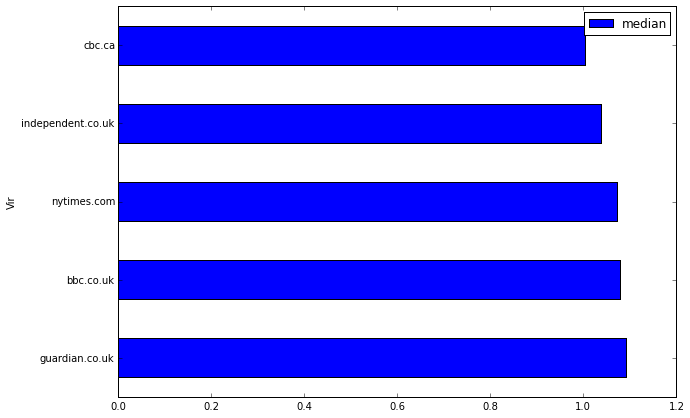

In [157]:
naj_viri_5[['Vir','median']].plot(kind='barh',x='Vir', y='median',figsize=(10,7))

In [159]:
vse_novice['povprecje']=((vse_novice.Score) + (vse_novice.Komentarji))/2
vse_novice[vse_novice['Vir']=='guardian.co.uk'].sort_values(['povprecje'],ascending=False).head()

,Naslov,Score,Komentarji,Vir,povprecje
18,NASA announces discovery of flowing water in Mars,8866,6151,guardian.co.uk,7508.5
375,Obama calls for police to wear body cameras as part of $263m reform package,5595,4404,guardian.co.uk,4999.5
150,Stephen Hawking joins academic boycott of Israel,1773,2253,guardian.co.uk,2013.0
395,The scale of unpaid tax now outstrips the national deficit. Forcing the elite to pay up is now a matter of justice and necessity.,2016,1875,guardian.co.uk,1945.5
574,Richard Dawkins celebrates a victory over creationists,1259,1491,guardian.co.uk,1375.0


#### Primerjava povprečnih ocen in komentarjev najpogostejših virov, ki se pojavijo v  kategorijah kontraverzno in najboljše 

In [261]:
#združimo po skupinah najboljše in kontraverzno po virih
kontraverznoV=pd.merge(news_con_viri.mean(),wnews_con_viri.mean(),on='Vir', suffixes=('_wnews_con', '_news_con'))
najboljseV=pd.merge(news_top_viri.mean(),wnews_top_viri.mean(),on='Vir', suffixes=('_wnews_top', '_news_top'))
kontraverznoV['median_con']=kontraverznoV.median(axis=1)
najboljseV['median_top']=najboljseV.median(axis=1)

sez_naj10_con=list (naj10_con['Vir'])
sez_naj10_top=list (naj10_top['Vir'])

In [262]:
seznam_kategorij2=list (kontraverznoV.mean().reset_index()['index'])

for i in seznam_kategorij2:
    kontraverznoV['{0}'.format(i)] = kontraverznoV['{0}'.format(i)]/(kontraverznoV.mean()['{0}'.format(i)])

Kontraverzno_pogosti=kontraverznoV[(kontraverznoV['Vir']==sez_naj10_con[0])|
              (kontraverznoV['Vir']==sez_naj10_con[1])|
              (kontraverznoV['Vir']==sez_naj10_con[2])|
              (kontraverznoV['Vir']==sez_naj10_con[3])|
              (kontraverznoV['Vir']==sez_naj10_con[4])|
              (kontraverznoV['Vir']==sez_naj10_con[5])|
              (kontraverznoV['Vir']==sez_naj10_con[6])|
              (kontraverznoV['Vir']==sez_naj10_con[7])|
              (kontraverznoV['Vir']==sez_naj10_con[8])|
              (kontraverznoV['Vir']==sez_naj10_con[9])]
Kontraverzno_pogosti

,Vir,Score_wnews_con,Komentarji_wnews_con,Score_news_con,Komentarji_news_con,median_con
3,bbc.co.uk,0.018348,0.068645,1.893099,1.719555,1.400422
12,dailymail.co.uk,0.162911,0.166735,0.514996,0.498760,0.424102
17,foxnews.com,0.118827,0.573011,4.834959,13.332814,3.682819
25,independent.co.uk,2.597306,7.959554,2.153338,1.343910,3.308124
37,news.yahoo.com,0.147296,0.335572,0.249089,0.396227,0.271424
39,nytimes.com,7.139025,4.456628,0.490204,0.117625,1.547454
42,rt.com,3.888824,2.236774,0.474296,0.415880,1.134267
46,theguardian.com,2.240024,1.684771,1.982193,0.642820,1.492005
50,timesofisrael.com,0.018348,0.135357,0.013895,0.061424,0.046274
55,washingtonpost.com,2.773654,7.037885,0.000000,0.033563,0.862596


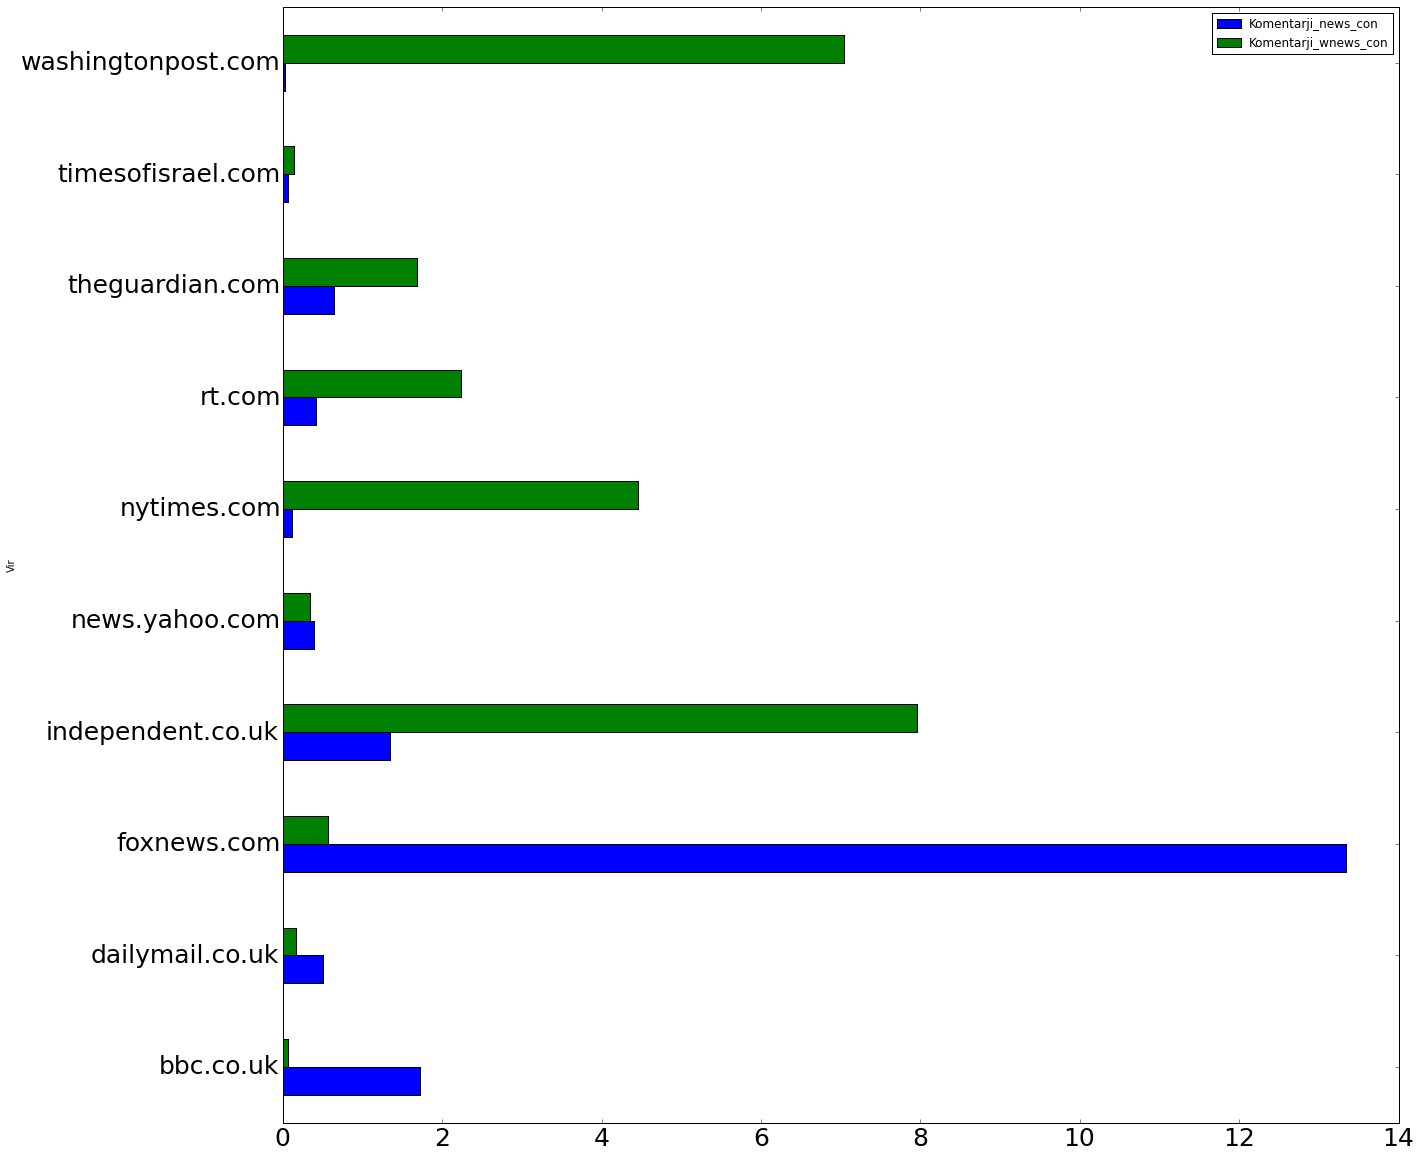

In [263]:
#primerjava komentarjev
Kontraverzno_pogosti[['Vir','Komentarji_news_con','Komentarji_wnews_con']].plot(x='Vir',kind='barh',stacked=False,figsize=(20,20),fontsize=25)

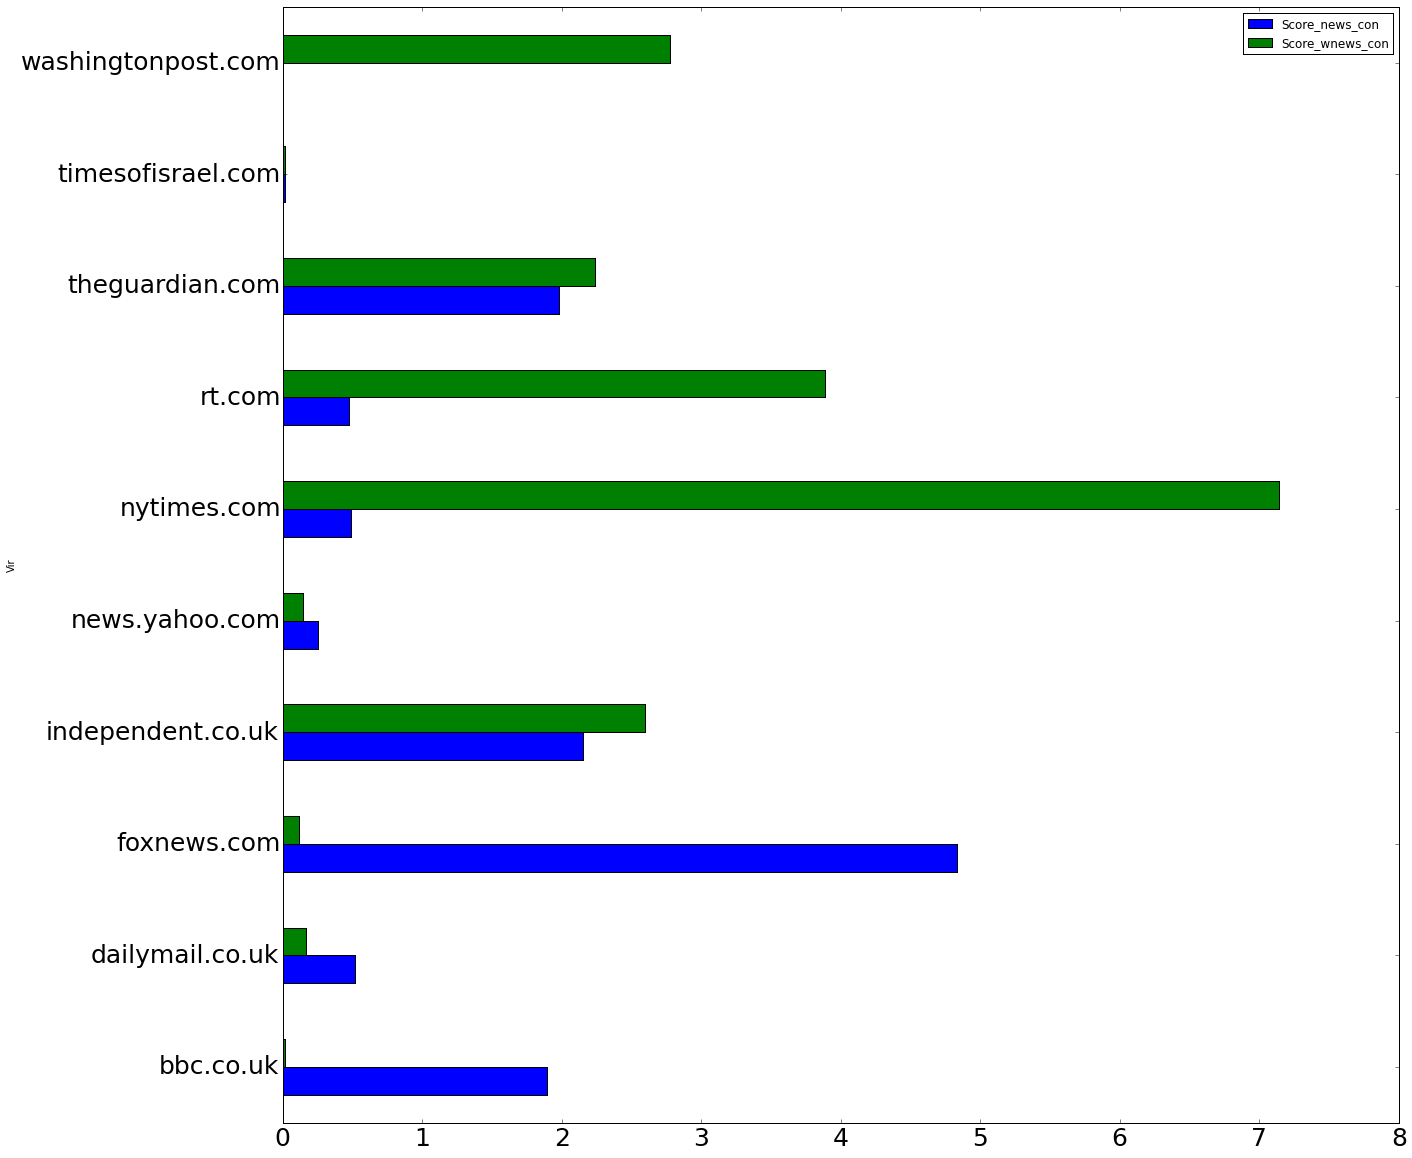

In [264]:
#primerjava ocen kontraverzno
Kontraverzno_pogosti[['Vir','Score_news_con','Score_wnews_con']].plot(x='Vir',kind='barh',stacked=False,figsize=(20,20),fontsize=25)

In [202]:
seznam_kategorij3 = list (najboljseV.mean().reset_index()['index'])

for i in seznam_kategorij3:
    najboljseV['{0}'.format(i)] = najboljseV['{0}'.format(i)]/(najboljseV.mean()['{0}'.format(i)])

Najboljse_pogosti=najboljseV[(najboljseV['Vir']==sez_naj10_top[0])|
              (najboljseV['Vir']==sez_naj10_top[1])|
              (najboljseV['Vir']==sez_naj10_top[2])|
              (najboljseV['Vir']==sez_naj10_top[3])|
              (najboljseV['Vir']==sez_naj10_top[4])|
              (najboljseV['Vir']==sez_naj10_top[5])|
              (najboljseV['Vir']==sez_naj10_top[6])|
              (najboljseV['Vir']==sez_naj10_top[7])|
              (najboljseV['Vir']==sez_naj10_top[8])|
              (najboljseV['Vir']==sez_naj10_top[9])]
Najboljse_pogosti


,Vir,Score_wnews_top,Komentarji_wnews_top,Score_news_top,Komentarji_news_top,median_top
4,bbc.co.uk,0.941324,2.654068,1.015126,1.666923,1.359803
5,bbc.com,1.003665,1.129562,0.981161,1.298628,1.027036
6,bigstory.ap.org,1.106114,0.479556,1.077803,0.775442,0.948650
25,independent.co.uk,0.972797,1.278787,0.994527,1.111978,1.042138
31,nbcnews.com,0.936261,1.202708,0.967901,1.594969,1.065231
35,news.yahoo.com,0.970967,0.731611,0.924281,1.092522,0.947810
40,nytimes.com,0.993970,1.382573,0.929948,1.347380,1.088481
42,reuters.com,0.950869,0.787269,0.948454,1.441607,1.032047
47,theguardian.com,0.983337,0.840818,1.000260,1.077998,0.951937
55,washingtonpost.com,1.039043,0.938158,0.949548,1.076566,0.988402


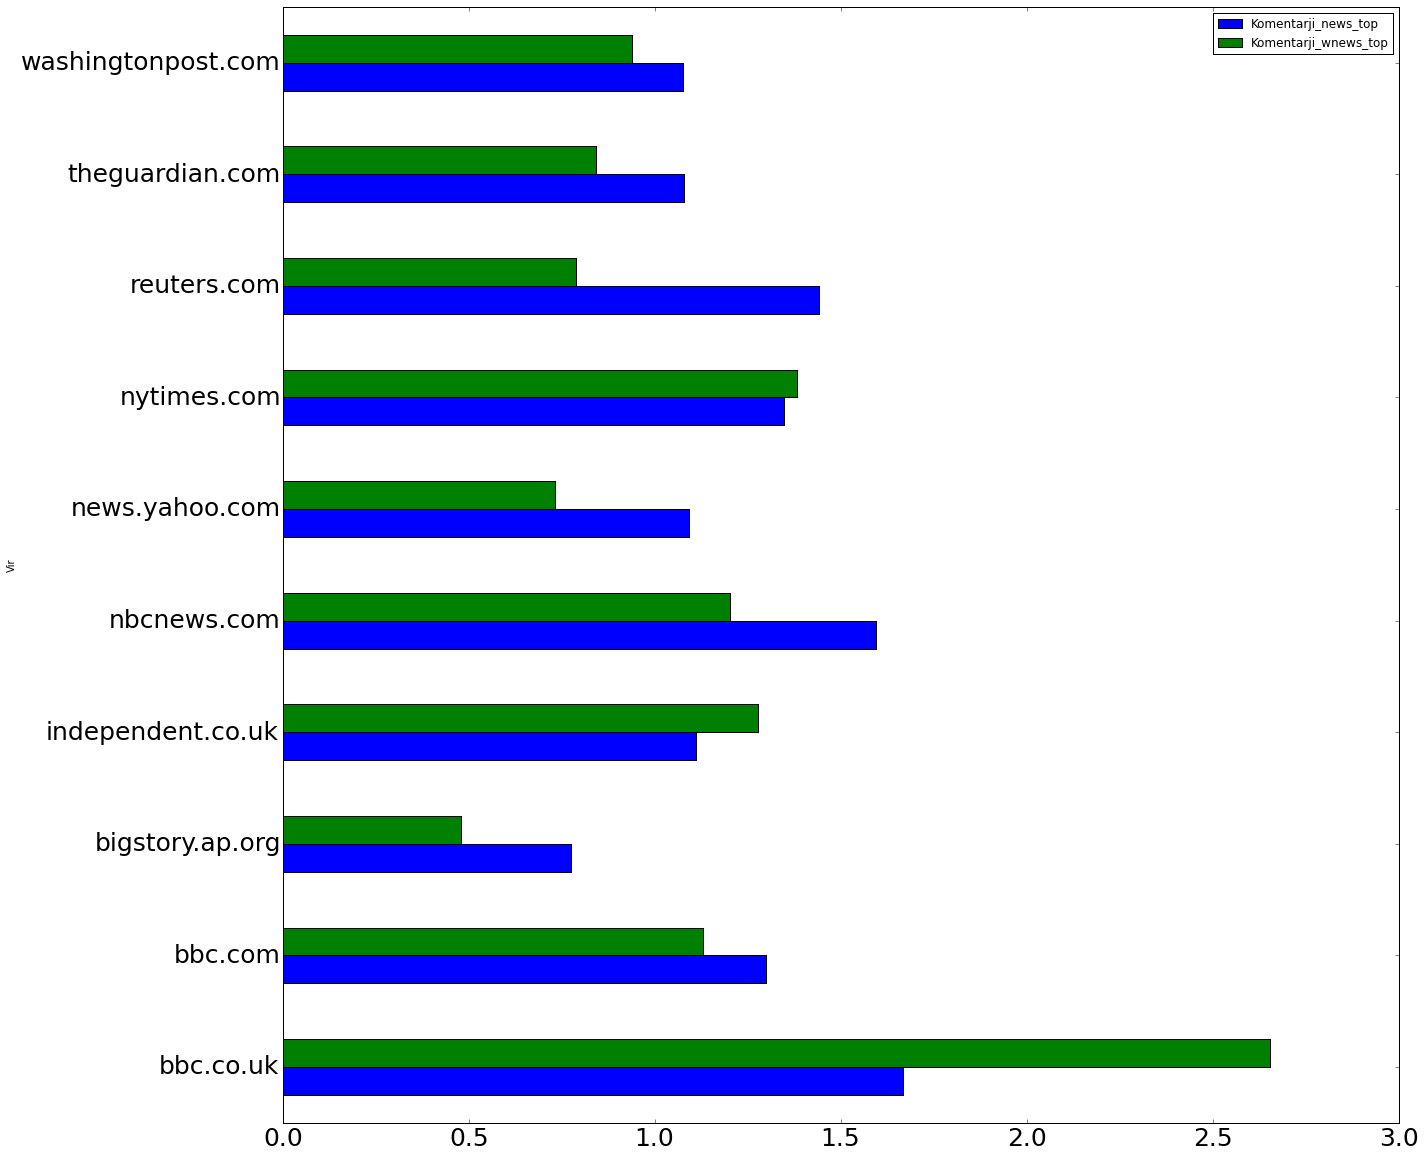

In [203]:
#primerjava komentarjev najboljse
Najboljse_pogosti[['Vir','Komentarji_news_top','Komentarji_wnews_top']].plot(x='Vir',kind='barh',stacked=False,figsize=(20,20),fontsize=25)

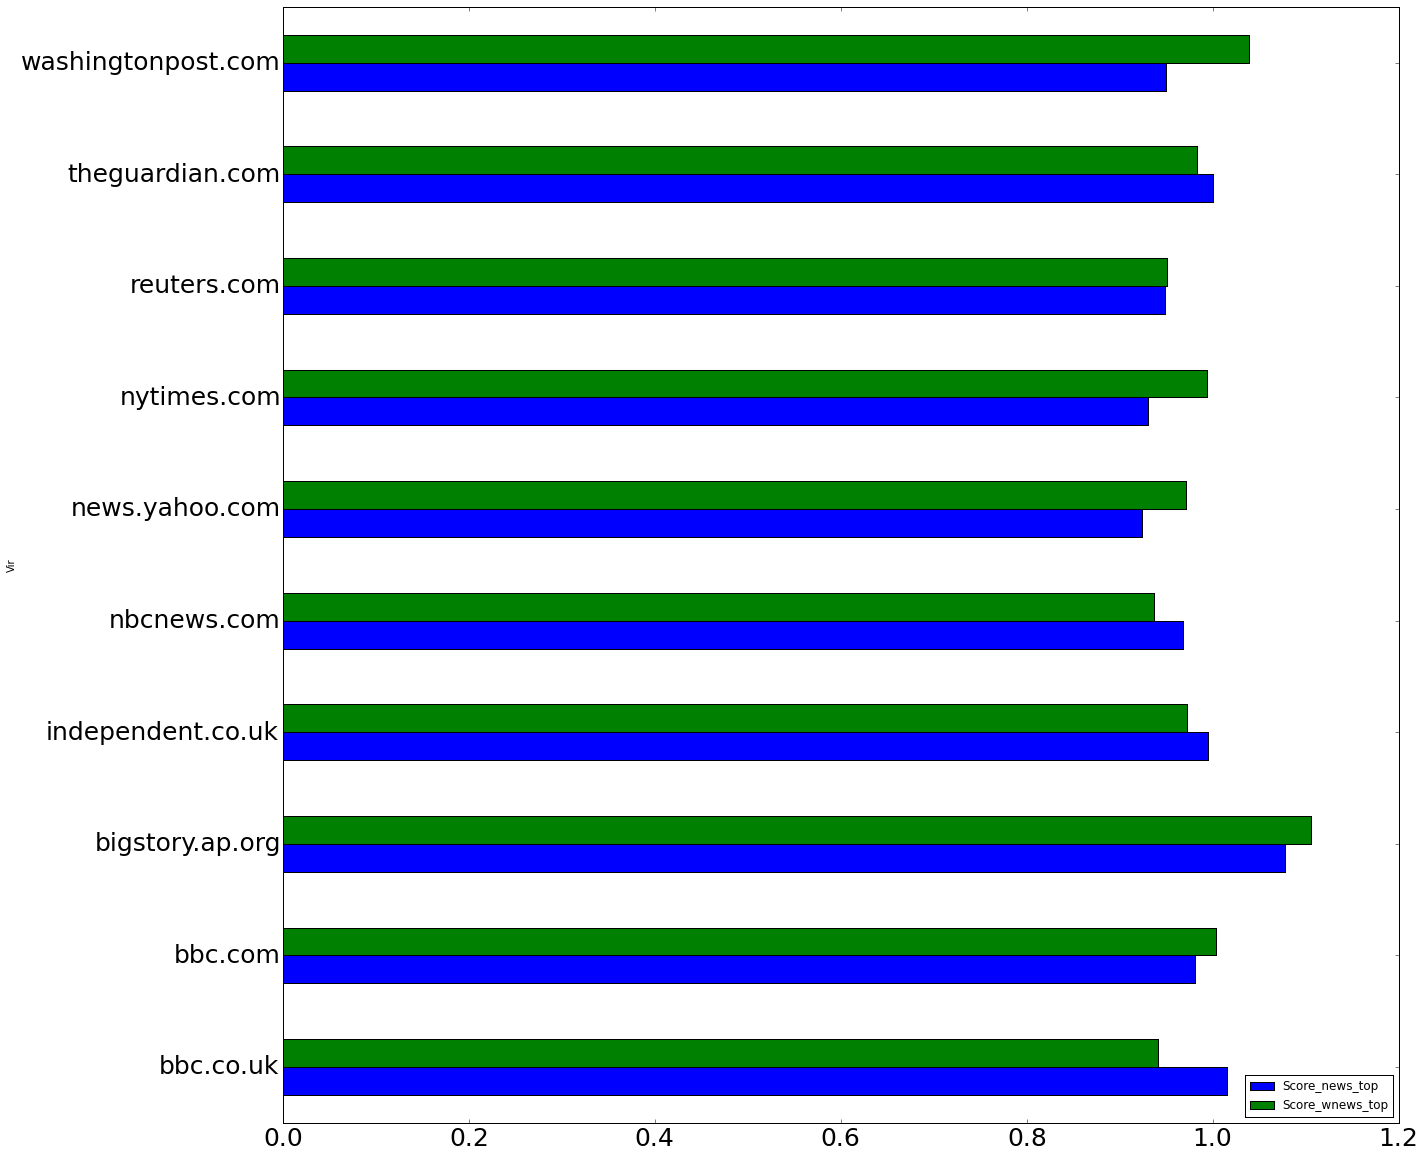

In [204]:
#primerjava ocen najboljse
Najboljse_pogosti[['Vir','Score_news_top','Score_wnews_top']].plot(x='Vir',kind='barh',stacked=False,figsize=(20,20),fontsize=25)

#### Kateri viri so izrazito kontraverzni?

In [205]:
skupna_viri=pd.merge(kontraverznoV,najboljseV,on= 'Vir')
skupna_viri['relativno']=skupna_viri.median_con-skupna_viri.median_top

In [215]:
skupna_viri.sort_values('relativno',ascending=False)[['Vir','relativno']].head()

,Vir,relativno
1,bbc.com,3.497304
4,cbc.ca,3.368605
7,foxnews.com,2.706213
10,independent.co.uk,2.265986
17,reuters.com,1.200857


#### Kateri viri so izrazito najboljsi?

In [216]:
skupna_viri.sort_values('relativno')[['Vir','relativno']].head()

,Vir,relativno
3,bloomberg.com,-1.024710
9,hosted.ap.org,-1.008147
11,latimes.com,-0.988747
22,usatoday.com,-0.965741
18,smh.com.au,-0.957847
